The dataset contains 189 countries and uses 2016 data from the WHO report published in 2018. The methodology used by the WHO calculated use by persons 15 years of age or older. All data in columns refer to year 2016.

Unrecorded consumption (homebrew, moonshine, smuggled alcohol, surrogate alcohol etc.) was calculated using expert judgements and surveys. Total is the sum of the recorded and unrecorded consumption. The next four columns are a breakdown of the recorded alcohol consumption by type. Beer refers to malt beer, wine refers to grape wine, spirits refers to all distilled beverages such as vodka and similar products, and the column "other" refers to all other alcoholic beverages, such as rice wine, soju, sake, mead, kumis, cider, kvass, and African beers (kumi kumi, kwete, banana beer, millet beer, umqombothi etc.). Worldwide consumption in 2016 was equal to 6.4 litres of pure alcohol consumed per person aged 15 years or older.

URL:
https://www.kaggle.com/datasets/mattop/alcohol-consumption-per-capita-2016


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
file = 'alcohol-consumption.csv'

In [4]:
df = pd.read_csv(file)
df.head()

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6


# Basic analysis

In [5]:
df.shape

(189, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 189 non-null    object 
 1   total_consumption       189 non-null    float64
 2   recorded_consumption    189 non-null    float64
 3   unrecorded_consumption  189 non-null    float64
 4   beer_percentage         179 non-null    float64
 5   wine_percentage         179 non-null    float64
 6   spirits_percentage      179 non-null    float64
 7   other_percentage        179 non-null    float64
 8   2020_projection         189 non-null    float64
 9   2025_projection         189 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.9+ KB


In [7]:
df.describe()

,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
count,189.000000,189.000000,189.000000,179.000000,179.000000,179.000000,179.000000,189.000000,189.000000
mean,6.183598,4.923280,1.379894,43.484358,16.306704,29.394413,10.807821,6.252910,6.451852
std,4.124949,3.774605,0.891459,22.147305,18.123067,24.027063,23.013580,4.101291,4.178982
min,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.400000,1.400000,0.800000,28.300000,2.150000,10.850000,0.000000,2.500000,2.700000
50%,6.300000,4.500000,1.300000,39.900000,8.500000,25.400000,0.700000,6.300000,6.600000
75%,9.400000,7.900000,1.800000,56.900000,27.950000,43.750000,4.650000,9.700000,10.200000
max,16.900000,15.800000,5.300000,100.000000,84.700000,97.300000,94.900000,16.200000,18.300000


In [8]:
df.isnull().sum()

country                    0
total_consumption          0
recorded_consumption       0
unrecorded_consumption     0
beer_percentage           10
wine_percentage           10
spirits_percentage        10
other_percentage          10
2020_projection            0
2025_projection            0
dtype: int64

In [9]:
df.loc[df['beer_percentage'].isnull()]

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
160,Iran,1.0,0.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
174,Sudan,0.5,0.0,0.5,NaN,NaN,NaN,NaN,0.0,0.0
179,Pakistan,0.3,0.0,0.3,NaN,NaN,NaN,NaN,0.3,0.4
181,Afghanistan,0.2,0.0,0.2,NaN,NaN,NaN,NaN,0.2,0.2
182,Saudi Arabia,0.2,0.1,0.2,NaN,NaN,NaN,NaN,0.2,0.2
184,Bangladesh,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
185,Kuwait,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
186,Libya,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
187,Mauritania,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
188,Somalia,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0


In [10]:
df.loc[df['beer_percentage'].isnull()].shape

(10, 10)

In [11]:
df.loc[df['recorded_consumption'] == 0].shape

(10, 10)

In [12]:
df.loc[df['recorded_consumption'] == 0]

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
160,Iran,1.0,0.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
174,Sudan,0.5,0.0,0.5,NaN,NaN,NaN,NaN,0.0,0.0
179,Pakistan,0.3,0.0,0.3,NaN,NaN,NaN,NaN,0.3,0.4
181,Afghanistan,0.2,0.0,0.2,NaN,NaN,NaN,NaN,0.2,0.2
183,Yemen,0.1,0.0,0.0,89.5,0.0,10.5,0.0,0.1,0.1
184,Bangladesh,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
185,Kuwait,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
186,Libya,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
187,Mauritania,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
188,Somalia,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0


In [13]:
df['total_consumption'].describe()

count    189.000000
mean       6.183598
std        4.124949
min        0.000000
25%        2.400000
50%        6.300000
75%        9.400000
max       16.900000
Name: total_consumption, dtype: float64

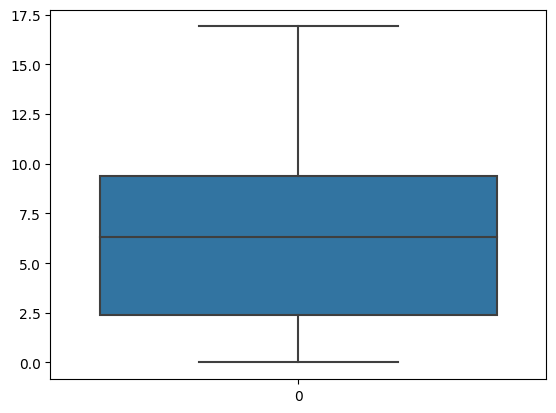

In [14]:
sns.boxplot(df['total_consumption'], orient='v')
plt.show()

# EDA

In [15]:
df.head()

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6


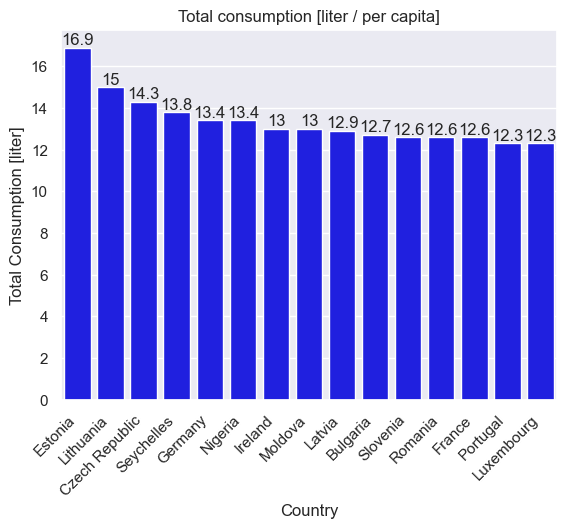

In [16]:
sns.set(style="darkgrid")
ax_1 = sns.barplot(data = df.sort_values('total_consumption', ascending=False).head(15), x='country', y='total_consumption', color = 'blue',)
ax_1.set(xlabel = 'Country', ylabel='Total Consumption [liter]', title='Total consumption [liter / per capita]')
ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax_1.bar_label(ax_1.containers[0])
plt.show()

In [17]:
# one condition for sort_values

beer_countries = df.sort_values('beer_percentage', ascending = False)
wine_countries = df.sort_values('wine_percentage', ascending = False)
spirits_countries = df.sort_values('spirits_percentage', ascending = False)
other_countries = df.sort_values('other_percentage', ascending = False)

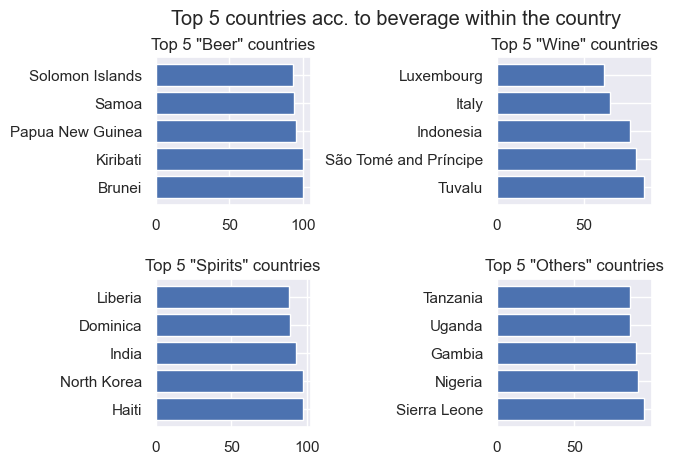

In [18]:
fig, ax_2 = plt.subplots(2,2)
fig.subplots_adjust(wspace=1.2, hspace=0.5)
ax_2[0, 0].barh(beer_countries['country'].head(5), beer_countries['beer_percentage'].head(5))
ax_2[0, 0].title.set_text('Top 5 "Beer" countries')
ax_2[0, 1].barh(wine_countries['country'].head(5), wine_countries['wine_percentage'].head(5))
ax_2[0, 1].title.set_text('Top 5 "Wine" countries')
ax_2[1, 0].barh(spirits_countries['country'].head(5), spirits_countries['spirits_percentage'].head(5))
ax_2[1, 0].title.set_text('Top 5 "Spirits" countries')
ax_2[1, 1].barh(other_countries['country'].head(5), other_countries['other_percentage'].head(5))
ax_2[1, 1].title.set_text('Top 5 "Others" countries')
fig.suptitle('Top 5 countries acc. to beverage within the country')
 
plt.show()

In [19]:
# more conditions for sort_values

beer_countries_total = df.sort_values(['total_consumption', 'beer_percentage' ], ascending = False)
wine_countries_total = df.sort_values(['total_consumption', 'wine_percentage' ], ascending = False)
spirits_countries_total = df.sort_values(['total_consumption', 'spirits_percentage'], ascending = False)
other_countries_total = df.sort_values(['total_consumption', 'other_percentage'], ascending = False)

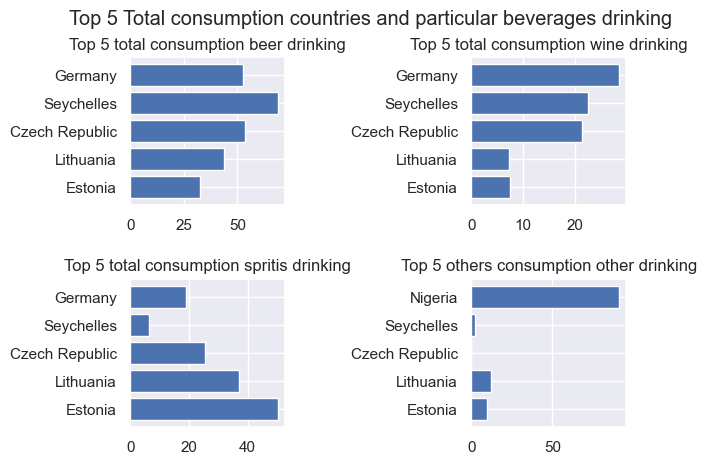

In [20]:
fig, ax_2 = plt.subplots(2,2)
fig.subplots_adjust(wspace=1.2, hspace=0.5)
ax_2[0, 0].barh(beer_countries_total['country'].head(5), beer_countries_total['beer_percentage'].head(5))
ax_2[0, 0].title.set_text('Top 5 total consumption beer drinking')
ax_2[0, 1].barh(wine_countries_total['country'].head(5), wine_countries_total['wine_percentage'].head(5))
ax_2[0, 1].title.set_text('Top 5 total consumption wine drinking')
ax_2[1, 0].barh(spirits_countries_total['country'].head(5), spirits_countries_total['spirits_percentage'].head(5))
ax_2[1, 0].title.set_text('Top 5 total consumption spritis drinking')
ax_2[1, 1].barh(other_countries_total['country'].head(5), other_countries_total['other_percentage'].head(5))
ax_2[1, 1].title.set_text('Top 5 others consumption other drinking')
fig.suptitle('Top 5 Total consumption countries and particular beverages drinking')
 
plt.show()

In [21]:
spirits_countries_total.head(5)

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6


In [22]:
other_countries_total.head(5)

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
5,Nigeria,13.4,9.6,3.8,7.9,0.4,0.6,91.1,13.0,12.5


In [23]:
top_15_total = df.sort_values('total_consumption', ascending=False).head(15)

In [24]:
top_15_total

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6
5,Nigeria,13.4,9.6,3.8,7.9,0.4,0.6,91.1,13.0,12.5
6,Ireland,13.0,11.3,1.4,47.0,28.0,18.8,6.2,13.5,13.9
7,Moldova,13.0,11.5,1.4,35.4,44.6,20.0,0.0,12.6,12.4
8,Latvia,12.9,11.1,1.9,42.8,11.1,40.0,6.1,14.0,15.1
9,Bulgaria,12.7,11.4,1.3,38.8,17.2,42.9,1.2,13.0,13.4


In [25]:
top_15_total.set_index("country", inplace = True)

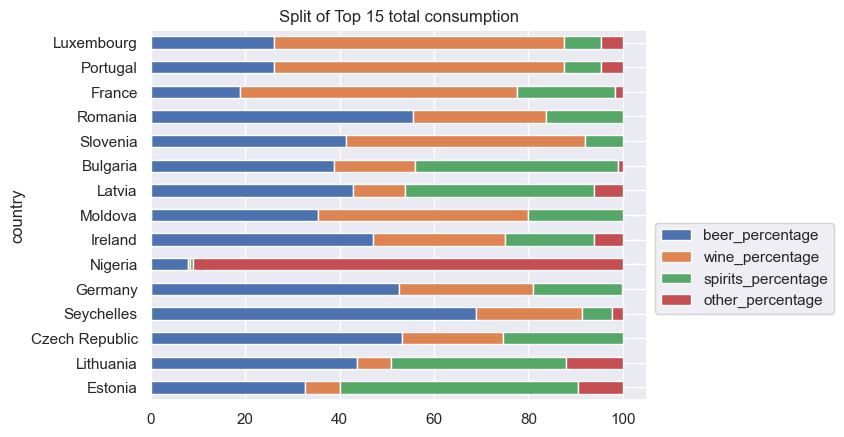

In [26]:
ax_3 = top_15_total.loc[: , ['beer_percentage', 'wine_percentage', 'spirits_percentage', 'other_percentage']].plot(kind = 'barh', stacked = True, title = 'Split of Top 15 total consumption', mark_right = True)
# ax_3.legend(loc='lower right')
ax_3.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

In [27]:
top_15_total_projection = top_15_total[['total_consumption', '2020_projection' , '2025_projection']]

In [28]:
top_15_total_projection

,total_consumption,2020_projection,2025_projection
country,,,
Estonia,16.9,11.5,11.9
Lithuania,15.0,14.4,13.9
Czech Republic,14.3,11.2,11.4
Seychelles,13.8,10.4,10.6
Germany,13.4,12.8,12.6
Nigeria,13.4,13.0,12.5
Ireland,13.0,13.5,13.9
Moldova,13.0,12.6,12.4
Latvia,12.9,14.0,15.1


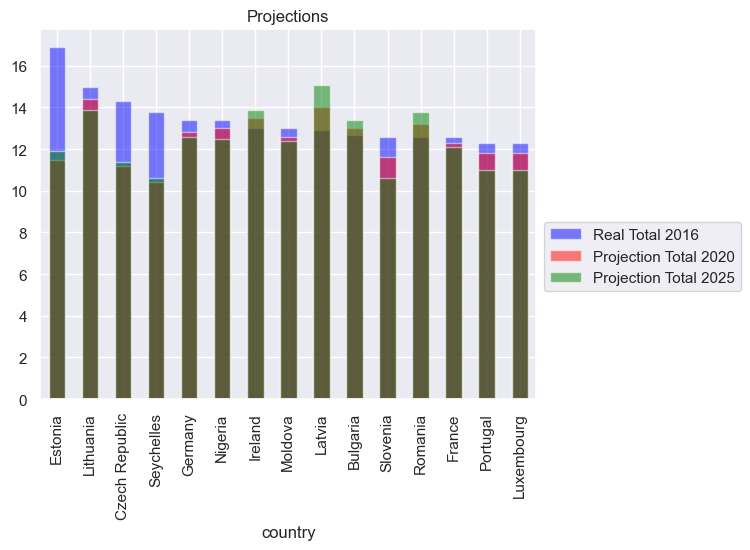

In [29]:
ax_4 = top_15_total_projection['total_consumption'].plot(kind = 'bar', stacked = True, title = 'Projections', mark_right = True, color='blue', alpha=0.5)
ax_4 = top_15_total_projection['2020_projection'].plot(kind = 'bar', stacked = True, mark_right = True, color='red', alpha=0.5)
ax_4 = top_15_total_projection['2025_projection'].plot(kind = 'bar', stacked = True, mark_right = True, color = 'green', alpha=0.5)
ax_4.legend(labels = ('Real Total 2016', 'Projection Total 2020', 'Projection Total 2025'), loc='upper left', bbox_to_anchor=(1, 0.5))

plt.show()

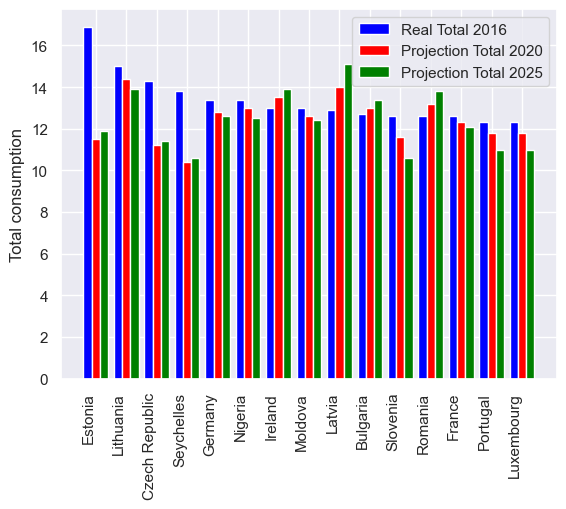

In [30]:
N_bars = 15
ind = np.arange(N_bars)
width = 0.27

fig = plt.figure()
ax_5 = fig.add_subplot(111) # 3 bars per each country

yvals = top_15_total_projection['total_consumption']
rects1 = ax_5.bar(ind, yvals, width, color='blue')
zvals = top_15_total_projection['2020_projection']
rects2 = ax_5.bar(ind+width, zvals, width, color='red')
kvals = top_15_total_projection['2025_projection']
rects3 = ax_5.bar(ind+width*2, kvals, width, color='green')

ax_5.set_ylabel('Total consumption')
ax_5.set_xticks(ind+width)
ax_5.set_xticklabels(top_15_total_projection['total_consumption'].index, rotation=90, horizontalalignment='right')
ax_5.legend((rects1[0], rects2[0], rects3[0]), ('Real Total 2016', 'Projection Total 2020', 'Projection Total 2025'))

plt.show()

In [31]:
rec_norec = df[['recorded_consumption', 'unrecorded_consumption']]
rec_norec.set_index(df['country'], inplace = True)

In [32]:
rec_norec.sort_values('recorded_consumption', ascending = False).head(15)

,recorded_consumption,unrecorded_consumption
country,,
Estonia,15.8,1.1
Lithuania,13.8,1.2
Czech Republic,12.4,1.4
Seychelles,12.4,1.4
France,11.8,1.5
Moldova,11.5,1.4
Austria,11.4,0.4
Bulgaria,11.4,1.3
Germany,11.3,1.4


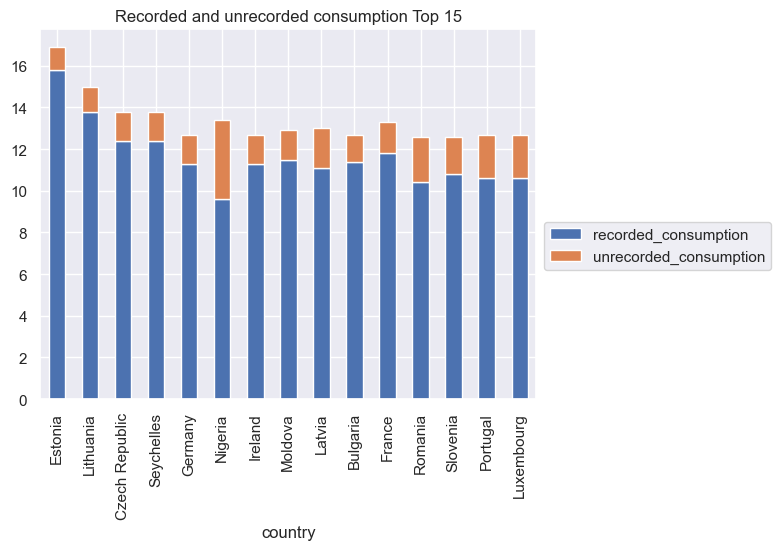

In [33]:
ax_6 = rec_norec.head(15).plot(kind = 'bar', stacked = True, title = 'Recorded and unrecorded consumption Top 15', mark_right = True)
ax_6.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

As Unrecorded consumption is based on experts review, could be provided by Machine Learning based on dataset available. The dataset is however quite small and because only two features will be used, quite simple Linear Model to be used without a need for Grid search or Ensamble technique. Various matrics to be calculated to find out precission.

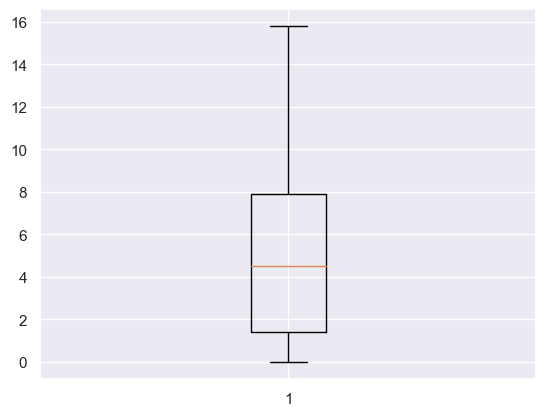

In [82]:
plt.boxplot(df['recorded_consumption'])
plt.show()

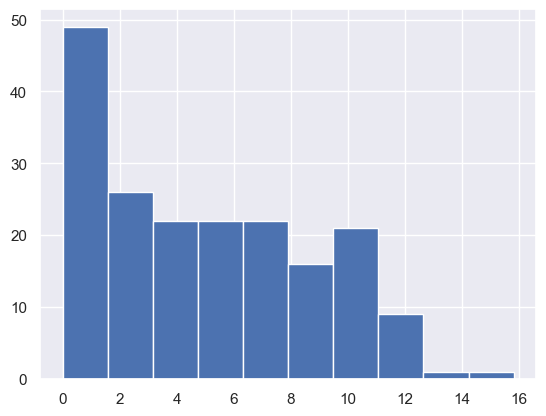

In [83]:
plt.hist(df['recorded_consumption'])
plt.show()

In [84]:
len(df.loc[df['recorded_consumption']>12])

4

In [85]:
df['recorded_consumption'].describe()

count    189.000000
mean       4.923280
std        3.774605
min        0.000000
25%        1.400000
50%        4.500000
75%        7.900000
max       15.800000
Name: recorded_consumption, dtype: float64

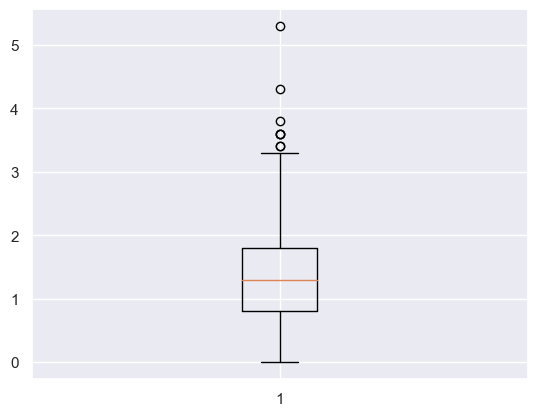

In [86]:
plt.boxplot(df['unrecorded_consumption'])
plt.show()

In [87]:
q1 = np.quantile(df['unrecorded_consumption'], 0.25)
q3 = np.quantile(df['unrecorded_consumption'], 0.75)
med = np.median(df['unrecorded_consumption'])

iqr = q3 - q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

1.0 3.3 -0.7


In [88]:
outliers = df['unrecorded_consumption'][(df['unrecorded_consumption'] <= lower_bound) | (df['unrecorded_consumption'] >= upper_bound)]

In [89]:
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:5     3.8
16    3.6
35    4.3
36    3.4
61    3.6
64    5.3
65    3.3
69    3.6
77    3.4
Name: unrecorded_consumption, dtype: float64


In [90]:
outliers_countries = []
outliers_list = []

In [91]:
for i in outliers.index:
    outliers_countries.append(df.iloc[i,0])
    outliers_list.append(i)

In [92]:
outliers_list, outliers_countries

([5, 16, 35, 36, 61, 64, 65, 69, 77],
 ['Nigeria',
  'Russia',
  'Greece',
  'Laos',
  'Ivory Coast',
  'Vietnam',
  'Burkina Faso',
  'North Macedonia',
  'Burundi'])

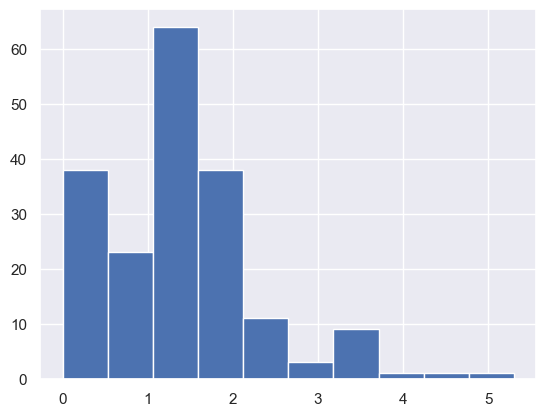

In [93]:
plt.hist(df['unrecorded_consumption'])
plt.show()

It seems there are some outliers, what can be problem with ML. So I will erase outliers for training set n.2 --> I will have two sets to see whether accuracy improved or not. 

# Machine Learning - regression problem

First analysis with origin set.

In [94]:
from sklearn import linear_model
import sklearn.metrics as sm

In [95]:
X = df['recorded_consumption']
y = df['unrecorded_consumption']

In [96]:
X = X.values.reshape(len(X), 1)
y = y.values.reshape(len(y), 1)

In [97]:
X.shape, y.shape

((189, 1), (189, 1))

In [98]:
X_train = X[:150]
X_test =X[150:]
y_train = y[:150]
y_test = y[150:]

In [99]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 1), (150, 1), (39, 1), (39, 1))

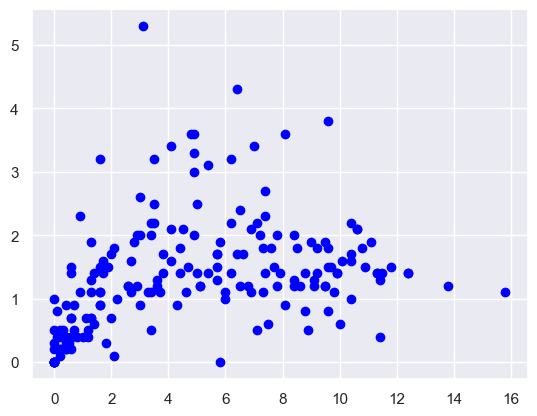

In [100]:
plt.scatter(X, y, color = 'blue')
plt.show()

In [101]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [102]:
# Tryout value = 9 litres of recorded consumption.
tryout = np.array([[9]])

In [103]:
tryout.shape

(1, 1)

In [104]:
lin_reg.predict(tryout)

array([[1.61855713]])

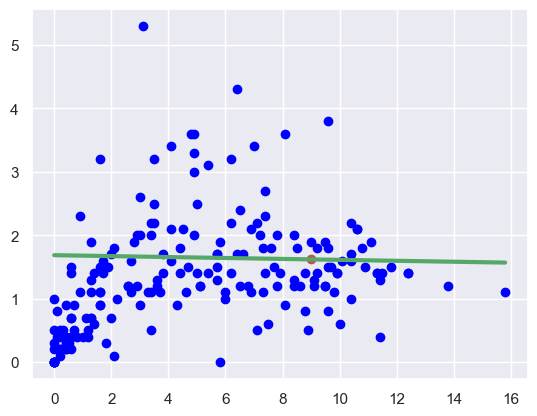

In [105]:
plt.scatter(X, y, color = 'blue')
plt.scatter(tryout, lin_reg.predict(tryout), color = 'r')
plt.plot(X, lin_reg.predict(X), color='g', linewidth=3)
plt.show()

In [106]:
y_test_pred = lin_reg.predict(y_test)

In [107]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
# print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
# print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
# print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
# print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 1.3


- Mean absolute error: This is the average of absolute errors of all the data points in the given dataset.
- Mean squared error: This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!
- Median absolute error: This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.
- Explained variance score: This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
- R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well.

Second analysis with adjusted set without outliers.

In [108]:
import copy
df_2nd = copy.deepcopy(df)

In [109]:
outliers_list

[5, 16, 35, 36, 61, 64, 65, 69, 77]

In [110]:
df_2nd = df_2nd[~df_2nd.index.isin(outliers_list)]

In [111]:
df_2nd.head(18)

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6
6,Ireland,13.0,11.3,1.4,47.0,28.0,18.8,6.2,13.5,13.9
7,Moldova,13.0,11.5,1.4,35.4,44.6,20.0,0.0,12.6,12.4
8,Latvia,12.9,11.1,1.9,42.8,11.1,40.0,6.1,14.0,15.1
9,Bulgaria,12.7,11.4,1.3,38.8,17.2,42.9,1.2,13.0,13.4
10,France,12.6,11.8,1.5,18.8,58.8,20.7,1.7,12.3,12.1


In [112]:
X2 = df_2nd['recorded_consumption']
y2 = df_2nd['unrecorded_consumption']

In [113]:
X2 = X2.values.reshape(len(X2), 1)
y2 = y2.values.reshape(len(y2), 1)

In [114]:
X2.shape, y2.shape

((180, 1), (180, 1))

In [115]:
X2_train = X2[:150]
X2_test =X2[150:]
y2_train = y2[:150]
y2_test = y2[150:]

In [116]:
X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape

((150, 1), (150, 1), (30, 1), (30, 1))

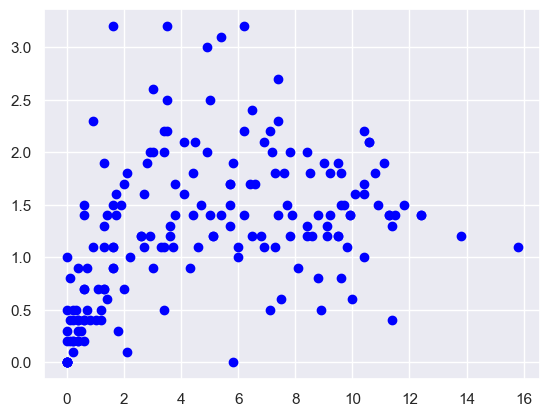

In [117]:
plt.scatter(X2, y2, color = 'blue')
plt.show()

In [118]:
lin_reg2 = linear_model.LinearRegression()
lin_reg2.fit(X2_train, y2_train)

LinearRegression()

In [119]:
# Prediction for unrecorded consumption with 9 liters of recorded.

lin_reg2.predict(tryout)

array([[1.50636342]])

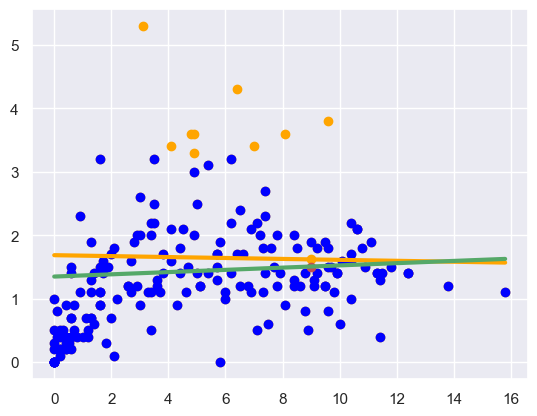

In [120]:
# origin
plt.scatter(X, y, color = 'orange')
plt.scatter(tryout, lin_reg.predict(tryout), color = 'orange')
plt.plot(X, lin_reg.predict(X), color='orange', linewidth=3)

#clean
plt.scatter(X2, y2, color = 'blue')
plt.scatter(tryout, lin_reg2.predict(tryout), color = 'r')
plt.plot(X2, lin_reg2.predict(X2), color='g', linewidth=3)

plt.show()

In [121]:
y2_test_pred = lin_reg2.predict(y2_test)

In [122]:
# origin
print("[Origin]")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
# print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
# print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
# print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
# print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))
print()
#clean
print("[Clean]")
print("Mean absolute error =", round(sm.mean_absolute_error(y2_test, y2_test_pred), 2)) 
# print("Mean squared error =", round(sm.mean_squared_error(y2_test, y2_test_pred), 2)) 
# print("Median absolute error =", round(sm.median_absolute_error(y2_test, y2_test_pred), 2)) 
# print("Explain variance score =", round(sm.explained_variance_score(y2_test, y2_test_pred), 2)) 
# print("R2 score =", round(sm.r2_score(y2_test, y2_test_pred), 2))

[Origin]
Mean absolute error = 1.3

[Clean]
Mean absolute error = 1.05


# Deep Machine Learning - regression problem

For simple deep machine learning neural network I will clean the data and I will use in one version the same number and in second version more features for DNN network.

In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Normalization
#from sklearn.preprocessing import StandardScaler

In [124]:
df.isna().sum()

country                    0
total_consumption          0
recorded_consumption       0
unrecorded_consumption     0
beer_percentage           10
wine_percentage           10
spirits_percentage        10
other_percentage          10
2020_projection            0
2025_projection            0
dtype: int64

In [125]:
X3 = X2.copy()
y3 = y2.copy()

In [126]:
train_features = X3[:150].copy()
test_features = X3[150:].copy()

train_labels = y3[:150]
test_labels = y3[150:]

In [127]:
train_features.shape, test_labels.shape

((150, 1), (30, 1))

In [128]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X3))
print(normalizer.mean.numpy())
first = np.array(X3[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

[[4.875556]]
First example: [[15.8]]

Normalized: [[2.85]]


In [129]:
recorded = np.array(train_features)

recorded_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
recorded_normalizer.adapt(train_features)

In [130]:
recorded_model = tf.keras.Sequential([
    recorded_normalizer,
    tf.keras.layers.Dense(units=1)
])

recorded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [131]:
recorded_model.predict(recorded[:10])

1/1 [==============================] - 0s 71ms/step


array([[-3.946921 ],
       [-3.1574314],
       [-2.6047883],
       [-2.6047883],
       [-2.1705694],
       [-2.1705694],
       [-2.2495184],
       [-2.0916207],
       [-2.2100437],
       [-2.3679419]], dtype=float32)

In [132]:
recorded_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [156]:
%%time
history = recorded_model.fit(
    train_features,
    train_labels,
    epochs=150,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 4.2 s
Wall time: 3.64 s


In [157]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
145,0.436813,0.696330,145
146,0.435489,0.706606,146
147,0.436751,0.740524,147
148,0.440029,0.765355,148
149,0.439373,0.736297,149


In [158]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [recorded]')
    plt.legend()
    plt.grid(True)

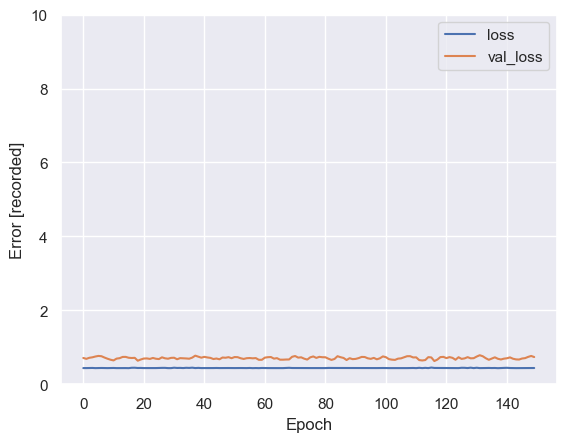

In [159]:
plot_loss(history)

In [160]:
test_results = {}

test_results['recorded_model'] = recorded_model.evaluate(
    test_features,
    test_labels, verbose=0)

In [161]:
result_y = recorded_model.predict(X2)
result_y2 = recorded_model.predict([9])

1/1 [==============================] - 0s 37ms/step


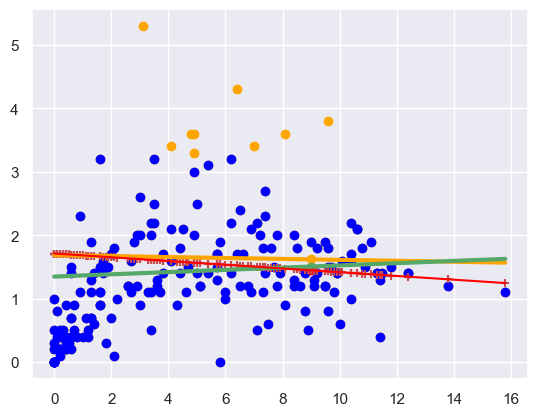

In [162]:
# origin
plt.scatter(X, y, color = 'orange')
plt.scatter(tryout, lin_reg.predict(tryout), color = 'orange')
plt.plot(X, lin_reg.predict(X), color='orange', linewidth=3)

#clean
plt.scatter(X2, y2, color = 'blue')
plt.scatter(tryout, lin_reg2.predict(tryout), color = 'g')
plt.plot(X2, lin_reg2.predict(X2), color='g', linewidth=3)

plt.plot(X2, result_y, color = 'red')
plt.scatter(9, result_y2, color='red', marker="o")
plt.scatter(X2, result_y, color = 'r', marker="+")

plt.show()

In [180]:
# origin
print("[Origin ML]")
print("Mean absolute error =", round(sm.mean_absolute_error(X, y), 2)) 

print()
#clean
print("[Clean ML]")
print("Mean absolute error =", round(sm.mean_absolute_error(X, y), 2))

print()
# DNN
print("[DNN]")
print("Mean absolute error =", round(recorded_model.evaluate(X, y, verbose=0),2))

[Origin ML]
Mean absolute error = 3.67

[Clean ML]
Mean absolute error = 3.67

[DNN]
Mean absolute error = 0.73


In [676]:
y.shape

(30, 1)

In [437]:
df_3rd.isna().sum()

country                   0
total_consumption         0
recorded_consumption      0
unrecorded_consumption    0
beer_percentage           0
wine_percentage           0
spirits_percentage        0
other_percentage          0
2020_projection           0
2025_projection           0
dtype: int64

In [438]:
df_3rd = df_3rd.drop(['country', 'total_consumption','2020_projection', '2025_projection'], axis=1)

In [439]:
df_3rd

,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage
0,15.8,1.1,32.7,7.4,50.3,9.6
1,13.8,1.2,43.6,7.3,37.1,12.1
2,12.4,1.4,53.3,21.3,25.4,0.0
3,12.4,1.4,68.9,22.4,6.3,2.5
4,11.3,1.4,52.6,28.4,18.9,0.0
...,...,...,...,...,...,...
176,0.2,0.2,62.0,4.4,33.1,0.6
177,0.2,0.2,71.0,2.4,25.7,0.9
178,0.4,0.2,100.0,0.0,0.0,0.0
180,0.2,0.1,11.6,1.1,87.2,0.0


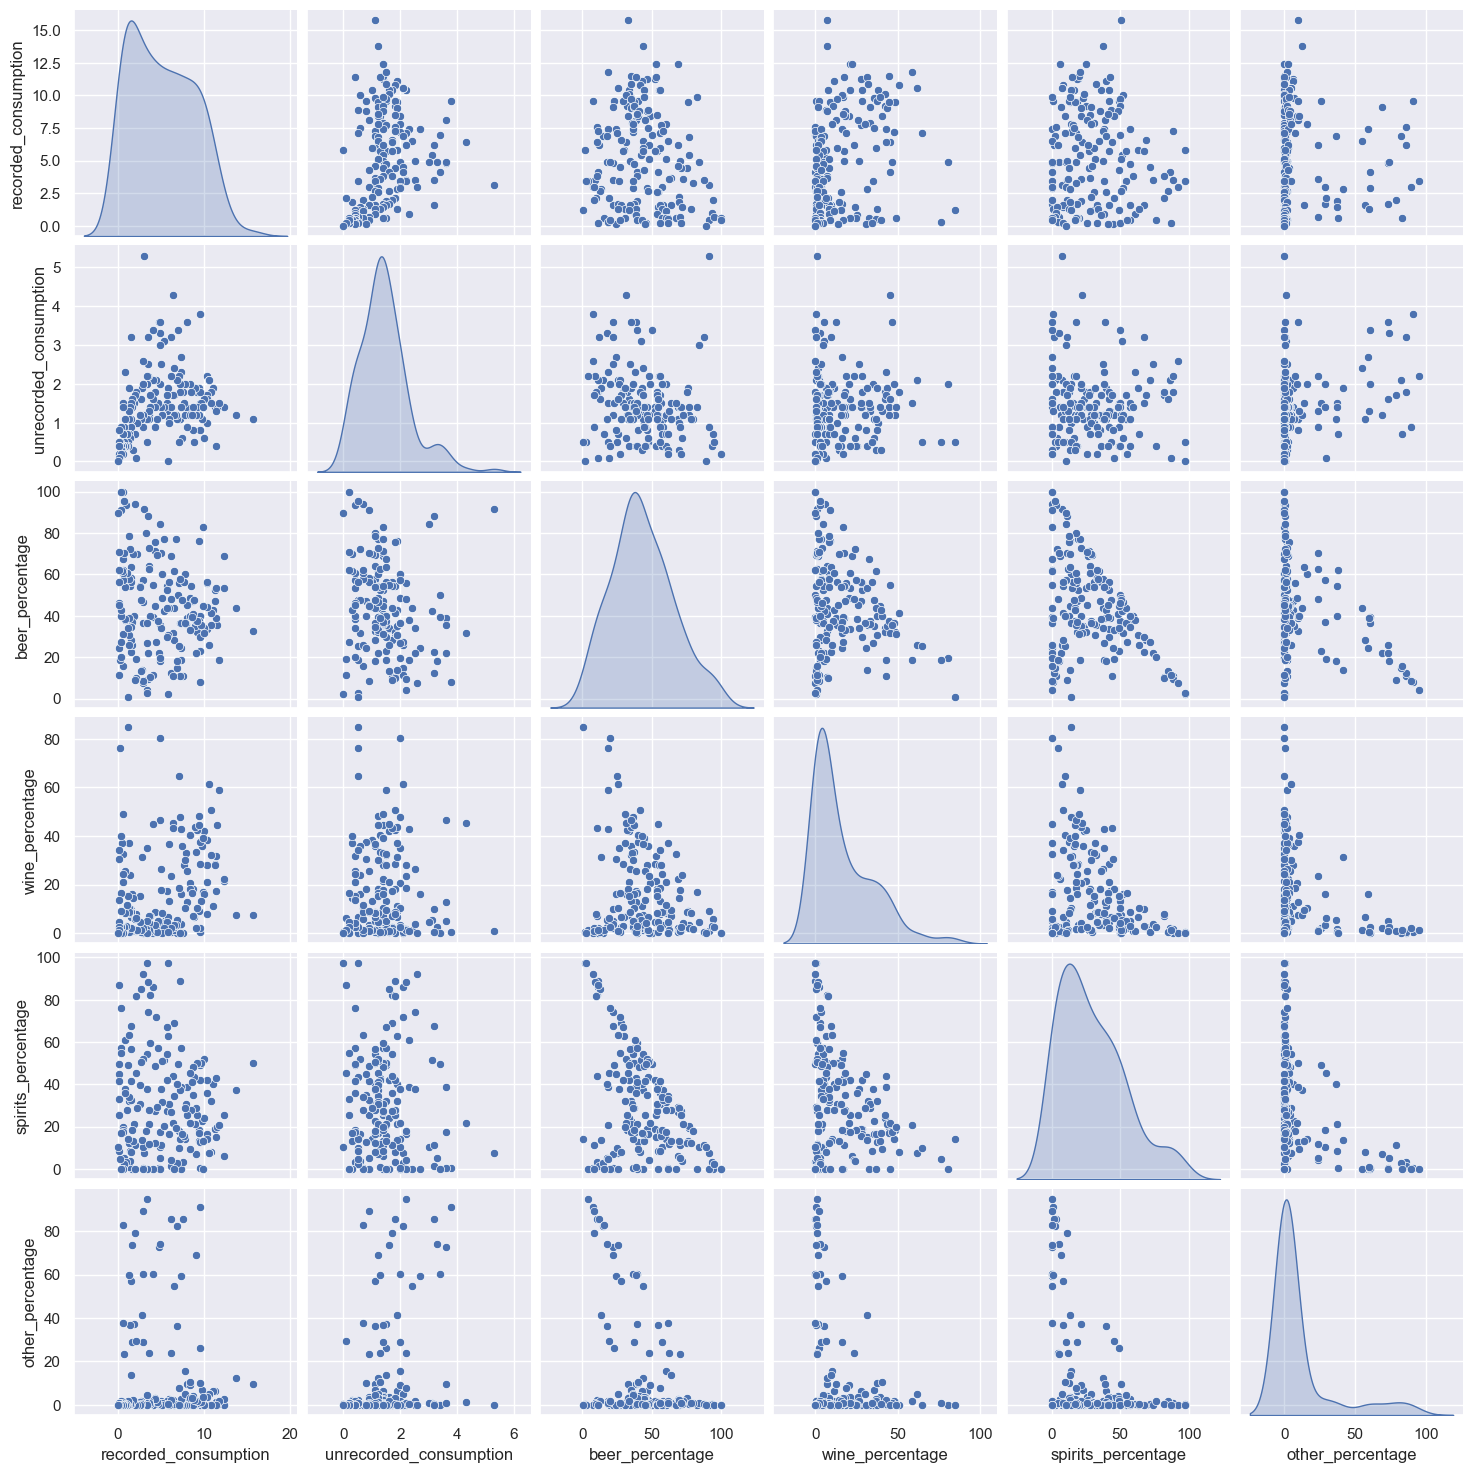

In [440]:
sns.pairplot(df_3rd, diag_kind='kde')

In [640]:
X4 = df_3rd

In [641]:
X4.drop(['unrecorded_consumption'], axis = 1)

,recorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage
0,15.8,32.7,7.4,50.3,9.6
1,13.8,43.6,7.3,37.1,12.1
2,12.4,53.3,21.3,25.4,0.0
3,12.4,68.9,22.4,6.3,2.5
4,11.3,52.6,28.4,18.9,0.0
...,...,...,...,...,...
176,0.2,62.0,4.4,33.1,0.6
177,0.2,71.0,2.4,25.7,0.9
178,0.4,100.0,0.0,0.0,0.0
180,0.2,11.6,1.1,87.2,0.0


In [642]:
y4 = df_3rd['unrecorded_consumption']

In [643]:
y4

0      1.1
1      1.2
2      1.4
3      1.4
4      1.4
      ... 
176    0.2
177    0.2
178    0.2
180    0.1
183    0.0
Name: unrecorded_consumption, Length: 179, dtype: float64

In [627]:
X3.describe().transpose()[['mean', 'std']]

,mean,std
recorded_consumption,5.197765,3.689995
unrecorded_consumption,1.444693,0.868495
beer_percentage,43.484358,22.147305
wine_percentage,16.306704,18.123067
spirits_percentage,29.394413,24.027063
other_percentage,10.807821,23.013580


In [628]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [629]:
normalizer.adapt(np.array(X3))

In [630]:
print(normalizer.mean.numpy())

[[ 5.197765   1.4446929 43.484356  16.306704  29.394413  10.807822 ]]


In [632]:
first = np.array(X3[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[15.8  1.1 32.7  7.4 50.3  9.6]]

Normalized: [[ 2.88 -0.4  -0.49 -0.49  0.87 -0.05]]


In [567]:
input_layer = X3.shape[1]

In [633]:
model = Sequential()

#model.add(normalizer)
model.add(Dense(32, input_dim = input_layer, activation = 'linear'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mse', optimizer = 'Adam', metrics = ['mse'])


In [634]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                224       
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [635]:
model.fit(X3,y3, epochs = 250, verbose = 1)

Epoch 1/250
6/6 [==============================] - 0s 2ms/step - loss: 54.8159 - mse: 54.8159
Epoch 2/250
6/6 [==============================] - 0s 2ms/step - loss: 30.4374 - mse: 30.4374
Epoch 3/250
6/6 [==============================] - 0s 1ms/step - loss: 14.5890 - mse: 14.5890
Epoch 4/250
6/6 [==============================] - 0s 2ms/step - loss: 5.8897 - mse: 5.8897
Epoch 5/250
6/6 [==============================] - 0s 1ms/step - loss: 3.4301 - mse: 3.4301
Epoch 6/250
6/6 [==============================] - 0s 2ms/step - loss: 2.9132 - mse: 2.9132
Epoch 7/250
6/6 [==============================] - 0s 2ms/step - loss: 2.9814 - mse: 2.9814
Epoch 8/250
6/6 [==============================] - 0s 2ms/step - loss: 2.7297 - mse: 2.7297
Epoch 9/250
6/6 [==============================] - 0s 2ms/step - loss: 2.3295 - mse: 2.3295
Epoch 10/250
6/6 [==============================] - 0s 1ms/step - loss: 1.8964 - mse: 1.8964
Epoch 11/250
6/6 [==============================] - 0s 2ms/step - loss: 1

6/6 [==============================] - 0s 2ms/step - loss: 0.0171 - mse: 0.0171
Epoch 90/250
6/6 [==============================] - 0s 1ms/step - loss: 0.0152 - mse: 0.0152
Epoch 91/250
6/6 [==============================] - 0s 2ms/step - loss: 0.0163 - mse: 0.0163
Epoch 92/250
6/6 [==============================] - 0s 2ms/step - loss: 0.0152 - mse: 0.0152
Epoch 93/250
6/6 [==============================] - 0s 2ms/step - loss: 0.0126 - mse: 0.0126
Epoch 94/250
6/6 [==============================] - 0s 2ms/step - loss: 0.0121 - mse: 0.0121
Epoch 95/250
6/6 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0105
Epoch 96/250
6/6 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0101
Epoch 97/250
6/6 [==============================] - 0s 2ms/step - loss: 0.0088 - mse: 0.0088
Epoch 98/250
6/6 [==============================] - 0s 2ms/step - loss: 0.0082 - mse: 0.0082
Epoch 99/250
6/6 [==============================] - 0s 2ms/step - loss: 0.0078 - ms

In [636]:
df_3rd.columns

Index(['recorded_consumption', 'unrecorded_consumption', 'beer_percentage',
       'wine_percentage', 'spirits_percentage', 'other_percentage'],
      dtype='object')

In [637]:
tryout_2 =np.array([[16.9,15.8,32.7,7.4,50.3,9.6]])

In [638]:
#tryout_2 = scaler.fit_transform(tryout_2)

In [639]:
tryout_2

array([[16.9, 15.8, 32.7,  7.4, 50.3,  9.6]])

In [560]:
model.predict(x=tryout_2)

1/1 [==============================] - 0s 20ms/step


array([[13.030238, 12.633915, 13.69178 ,  4.291371, 13.004438, 13.498379,
        13.848576, 12.409026, 13.703723, 12.076453, 13.203526, 13.420151,
        10.803417, 15.697161, 15.176066,  8.326309]], dtype=float32)

In [552]:
tryout.shape

(1, 1)

In [501]:
df

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6
...,...,...,...,...,...,...,...,...,...,...
184,Bangladesh,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
185,Kuwait,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
186,Libya,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
187,Mauritania,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0


In [561]:
X3

,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage
0,15.8,1.1,32.7,7.4,50.3,9.6
1,13.8,1.2,43.6,7.3,37.1,12.1
2,12.4,1.4,53.3,21.3,25.4,0.0
3,12.4,1.4,68.9,22.4,6.3,2.5
4,11.3,1.4,52.6,28.4,18.9,0.0
...,...,...,...,...,...,...
176,0.2,0.2,62.0,4.4,33.1,0.6
177,0.2,0.2,71.0,2.4,25.7,0.9
178,0.4,0.2,100.0,0.0,0.0,0.0
180,0.2,0.1,11.6,1.1,87.2,0.0
